In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import gmplot


In [5]:
#Read the data and print the first 5 lines
party_in_nyc = pd.read_csv('./partynyc/party_in_nyc.csv')
party_in_nyc.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [6]:
party_in_nyc["Closed Date"] = pd.to_datetime(party_in_nyc["Closed Date"])
party_in_nyc["Created Date"] = pd.to_datetime(party_in_nyc["Created Date"])
print(party_in_nyc.columns)
print(party_in_nyc.size)
party_in_nyc = party_in_nyc[party_in_nyc.Borough!='Unspecified']
party_in_nyc.Borough.unique()

Index([u'Created Date', u'Closed Date', u'Location Type', u'Incident Zip',
       u'City', u'Borough', u'Latitude', u'Longitude'],
      dtype='object')
1803312


array(['MANHATTAN', 'BROOKLYN', 'BRONX', 'QUEENS', 'STATEN ISLAND'], dtype=object)

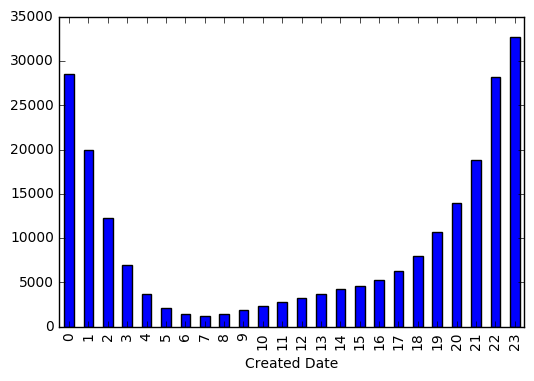

In [7]:
party_in_nyc.groupby([party_in_nyc["Created Date"].dt.hour,])['Borough'].count().plot(kind="bar")

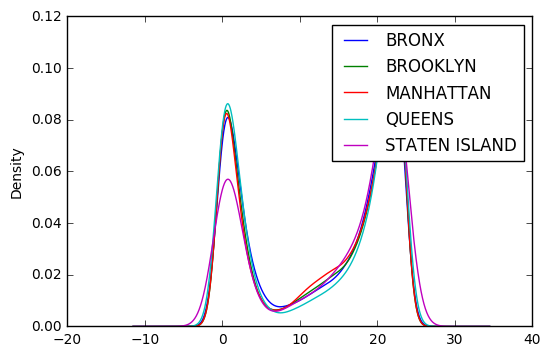

In [8]:
#plot the different created Dates for each borough

for label, df in party_in_nyc.groupby('Borough'):
    df["Created Date"].dt.hour.plot(kind="kde", label=label)
plt.legend()

In [9]:
#Encode categorical variables
party_in_nyc = pd.get_dummies(party_in_nyc, columns=["Borough", "Location Type"])
party_in_nyc.head()

,Created Date,Closed Date,Incident Zip,City,Latitude,Longitude,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Location Type_Club/Bar/Restaurant,Location Type_House of Worship,Location Type_Park/Playground,Location Type_Residential Building/House,Location Type_Store/Commercial,Location Type_Street/Sidewalk
0,2015-12-31 00:01:15,2015-12-31 03:48:04,10034.0,NEW YORK,40.866183,-73.918930,0,0,1,0,0,0,0,0,0,1,0
1,2015-12-31 00:02:48,2015-12-31 04:36:13,10040.0,NEW YORK,40.859324,-73.931237,0,0,1,0,0,0,0,0,0,1,0
2,2015-12-31 00:03:25,2015-12-31 00:40:15,10026.0,NEW YORK,40.799415,-73.953371,0,0,1,0,0,0,0,0,1,0,0
3,2015-12-31 00:03:26,2015-12-31 01:53:38,11231.0,BROOKLYN,40.678285,-73.994668,0,1,0,0,0,0,0,0,1,0,0
4,2015-12-31 00:05:10,2015-12-31 03:49:10,10033.0,NEW YORK,40.850304,-73.938516,0,0,1,0,0,0,0,0,1,0,0


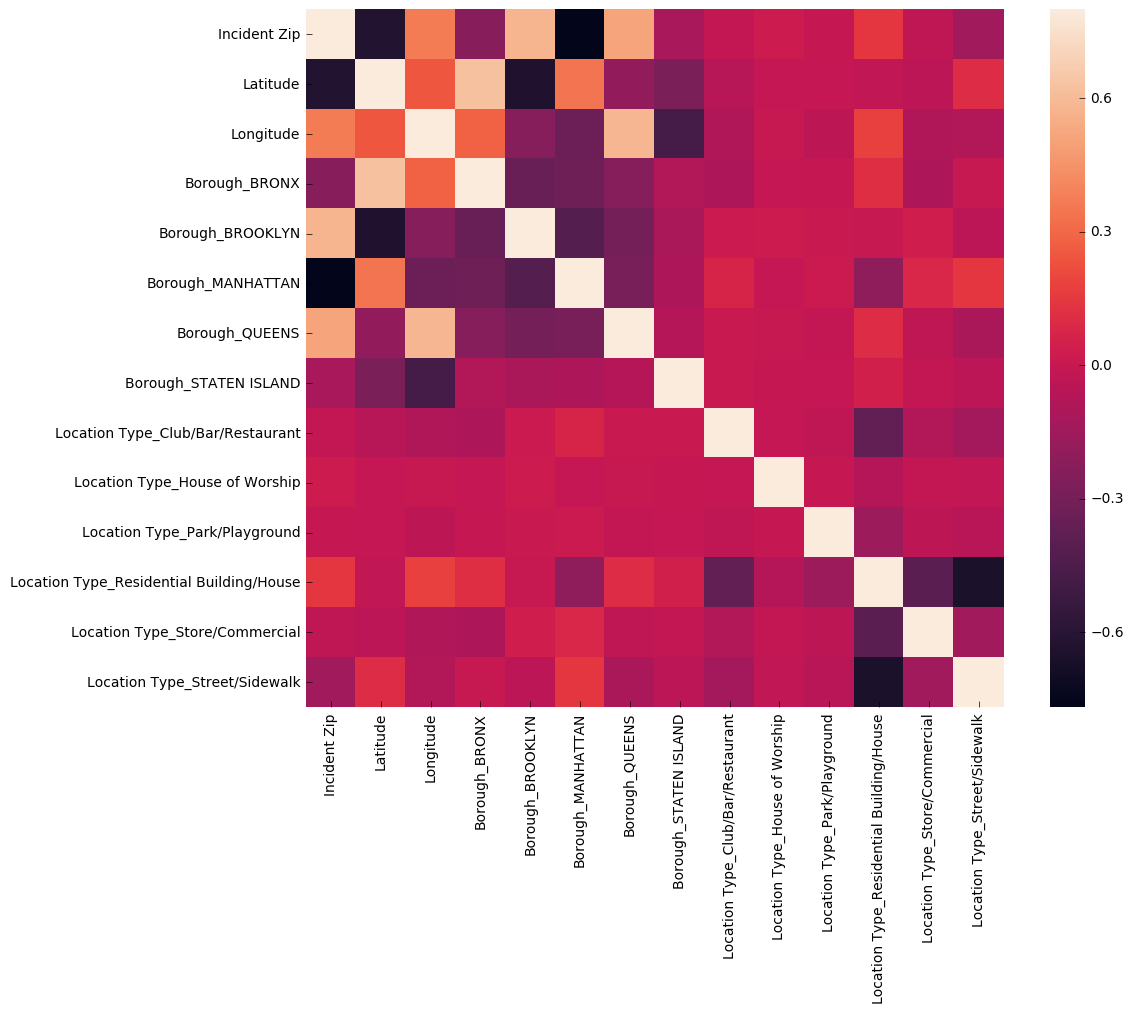

In [10]:
#Correlation Matrix (heatmap style)

corrmat = party_in_nyc.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax = .8, square=True)

In [22]:
gmap = gmplot.GoogleMapPlotter.from_geocode("New York")
gmap.scatter(party_in_nyc['Latitude'], party_in_nyc['Longitude'], 'green', edge_width=3)
gmap.draw("mymap.html")

